## Titanic Data Analysis

Through this notebook we shall analyze what factors made people more likely to survive. I personally believe it has to do with gender, age and class. I will further break This question down and we can ask "was gender and age a factor in survival" as made popular in the Titanic movie "women and children first". I also want to answer "Did adults who have a higher social class survive more than people in lower social classes?" we would conduct this analysis by means of grouping people by both cabin and people who survived.

###### Load Data from CSV file

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

#Read in csv file 

filename = r'C:\\Users\\Krishna\\Desktop\\udacity projects\\p2\\p2 project\\titanic-data.csv'
titanicdata = pd.read_csv(filename)

#check to see if the data has loaded properly
titanicdata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fixing Data Types

looking at the raw data file itself there are several instances where age is blank or it is half a number so what I want to do here is remove instances where the age is blank because it won't give me any relevant information. and with the half numbers i want to round it up or down to the nearest whole number.

##### Removing records with blank age

In [2]:
#check to see length of the titanic data file
len(titanicdata)

891

In [3]:
titanicdata = titanicdata[titanicdata.Age.notnull()]
len(titanicdata)

714

##### Rounding age values

In [4]:
#loop through each value in the age column and then apply the round function
for x in titanicdata.Age:
    x.round

#check to see if length is the same after cleanup step 1
len(titanicdata)

#titanicdata = titanicdata.loc([titanicdata.Age]).apply(np.round) gave me some key error hm..

714

## Data exploration

here are some general descriptions of the data

In [5]:
titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


we see that on average only 40% of the people survived (from this dataset) and the average age of the person aboard the ship was 29.69 

##### Grouping data by survived, gender and age
Here we want to see the number of people that survived, what the gender was, and how old they were 

In [6]:
#Remove all instances with people who didn't live
groupeddata = titanicdata[titanicdata.Survived != 0]

In [35]:
#group data by people who survived

totalsurvivors = groupeddata.groupby(['Survived'])['PassengerId'].count()
print totalsurvivors

Survived
1    290
Name: PassengerId, dtype: int64


After removing the number of people who didn't survive we see that the number of people who survived was 290. Doing a spot check we see that 290/714 (total number of records after the clean up) we get a value of .406 this is equal to the mean that we saw in the previous step. I want to go ahead and create a plot to see how the 290 survivors were distributed across the the 3 classes. And at first I thought let's do a scatter plot.

Populating the interactive namespace from numpy and matplotlib


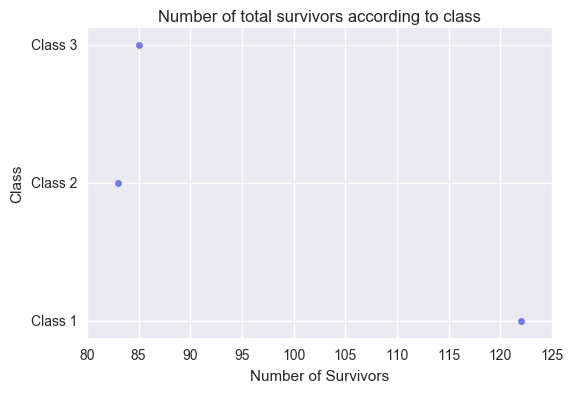

In [49]:
%pylab inline 

x = groupeddata.groupby(['Pclass'])['PassengerId'].count()
y = np.arange(len(x))
yaxis = ('Class 1','Class 2', 'Class 3')
plt.yticks(y_pos, yaxis)
plt.scatter(x,y, alpha = .5)
plt.xlabel('Number of Survivors')
plt.ylabel('Class')
plt.title('Number of total survivors according to class')
plt.show()

Alright, so this wasn't quite the plot I was hoping to see, but seeing as how I grouped the passengers both by class and the Passenger ID and counted the number of people, this makes sense. But this plot is a little hard to read and doesn't quite break down the survivors into categories such as children, men and women. So let's go ahead and take a look at that in order to see if class and gender was really a factor in survival. 

In [34]:
#count total number of male and female survivors

totalsurvivorsbygender = groupeddata.groupby(['Survived','Sex'])['PassengerId'].count()
print totalsurvivorsbygender

Survived  Sex   
1         female    197
          male       93
Name: PassengerId, dtype: int64


Breaking our survivors down by gender we see that 104 more females made it out than males. This is starting to support my Titanic movie theory of "Women and children first" but we need to do some further analysis and we also need to keep in mind that this entire data set is only a sample as there were 2229 total passengers on board.

In [9]:
#count average, min, and max age of total survivors
survivordata  = groupeddata.groupby(['Survived'])['Age']
survivordata.describe()

Survived       
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

I got curious and wanted to see the average age of the survivor and here we see that the average survivor was in their late 20s but there was a pretty big standard deviation of roughly 15 years.

In [10]:
#how many of the people who did survive were children(in this case < 18)

survivingchildren =  titanicdata[titanicdata.Survived != 0]
survivingchildren = survivingchildren[survivingchildren.Age < 18]
print len(survivingchildren)

#print survivingchildren


61


I wanted to first break the survivors down into children and adults. Here I took the number of people that survived from the data and the I broke it down to only people who were under the age of 18. I got 61 survivors as a result.

In [11]:
#how many of the children who survived were in upper middle and lower classes
kidsbyclass = survivingchildren.groupby(['Pclass'])['PassengerId'].count()
print kidsbyclass

Pclass
1    11
2    21
3    29
Name: PassengerId, dtype: int64


I then went ahead and broke down the 61 survivors by class and found that we had 11 first class children, 21 second class children, and 29 third class children

Populating the interactive namespace from numpy and matplotlib


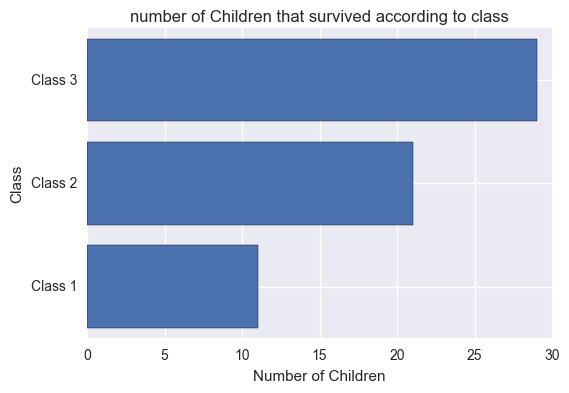

In [31]:
%pylab inline

yaxis = ('Class 1','Class 2', 'Class 3')
y_pos = np.arange(len(kidsbyclass))
plt.barh(y_pos, kidsbyclass, align='center', alpha=1)
plt.yticks(y_pos, yaxis)
plt.title("number of Children that survived according to class")
plt.xlabel('Number of Children')
plt.ylabel('Class')
plt.show()


Since the scatter plot didn't work earlier, I wanted to represent the findings as a bar graph. I feel as though this is much easier to read. Mathematically if we take 61 survivors away from the total number of survivors, 290, we should get 229 survivors.

In [12]:
#how many of the people who did survive were adults broken down by gender
survivingadults = titanicdata[titanicdata.Survived != 0]
#survivingadults = survivingadults - survivingchildren
survivingadults = survivingadults[survivingadults.Age >= 18]
print len(survivingadults) 

229


In this step I do just that and find that there are 229 adult survivors ages 18 and up. I want to now further break down the data we have by gender and class again.

In [50]:
femaleadults = survivingadults[survivingadults.Sex != 'male']
numberoffemale = femaleadults.groupby(['Sex'])['PassengerId'].count()
#print len(femaleadults)
print numberoffemale

Sex
female    159
Name: PassengerId, dtype: int64


I removed the male passengers and then grouped the number of female passengers by the categories 'Sex' and 'PassengerId' and then I counted the remaining records. I got a 159 records of adult females that survived the titanic.

In [14]:
femaleadultsbyclass = femaleadults.groupby(['Sex','Pclass'])['PassengerId'].count()
print femaleadultsbyclass

Sex     Pclass
female  1         75
        2         56
        3         28
Name: PassengerId, dtype: int64


I then further broke it down by class and this shows us that there were 75 females from first class, 56 females from second class and 28 females from third class. Doing a spot check 75+56+28 = 159. This data hints at the fact that rich females did have more of a chance to make it out alive.

Populating the interactive namespace from numpy and matplotlib


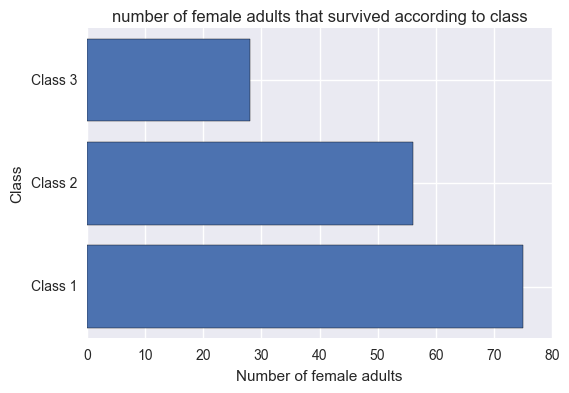

In [51]:
%pylab inline

yaxis = ('Class 1','Class 2', 'Class 3')
y_pos = np.arange(len(femaleadultsbyclass))
plt.barh(y_pos, femaleadultsbyclass, align='center', alpha=1)
plt.yticks(y_pos, yaxis)
plt.title("number of female adults that survived according to class")
plt.xlabel('Number of female adults')
plt.ylabel('Class')
plt.show()

Here I have graphed out by class the number female adults that survived. From this graph I can start to make inferences about the rest of the population. I am going to do the same process as before on the male population. Doing a spot check we should get 70 male adults because 290 - 61 - 159 = 70

In [15]:
maleadults = survivingadults[survivingadults.Sex != 'female']
numberofmale = maleadults.groupby(['Sex'])['PassengerId'].count()
#print maleadults
print numberofmale

Sex
male    70
Name: PassengerId, dtype: int64


Sure enough I get 70 by removing the female records and then grouping by 'Sex' and looking up 'PassengerId'

In [16]:
maleadultsbyclass = maleadults.groupby(['Sex','Pclass'])['PassengerId'].count()
print maleadultsbyclass

Sex   Pclass
male  1         36
      2          6
      3         28
Name: PassengerId, dtype: int64


When I break the males down by class I see something interesting happening, there are almost as many 3rd class males who survived as there are first class males. This is interesting to see. With the female adults it was step ladder with class 1 having the most and class 2 having the second most and then class 3 having the least. So why then is it different for the male adults?

Populating the interactive namespace from numpy and matplotlib


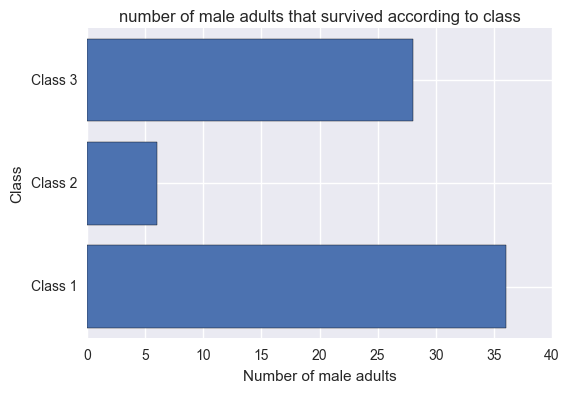

In [33]:
%pylab inline

yaxis = ('Class 1','Class 2', 'Class 3')
y_pos = np.arange(len(maleadultsbyclass))
plt.barh(y_pos, maleadultsbyclass, align='center', alpha=1)
plt.yticks(y_pos, yaxis)
plt.title("number of male adults that survived according to class")
plt.xlabel('Number of male adults')
plt.ylabel('Class')
plt.show()

looking at this, the graph isn't the perfect step ladder like the previous graph. I have a theory and I think there are almost as many 3rd class males that survived as first because 3rd class included workers aboard the ship. When people were escaping to the boats these workers would guide people to the boats and then commandeer the boats until help arrived and the entire boat survived. 

## Conclusions

References:
http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
http://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object
https://pythonspot.com/en/matplotlib-bar-chart/
http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html